In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Structured_Data_Assignment/train.parquet')


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
3220863,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
3220864,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
3220865,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
3220866,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


# Taking only the rows that contains 'TARGET DRUG' in Incident column

In [ ]:
df_took_td_only = df[df['Incident']=='TARGET DRUG'].reset_index(drop=True)

In [ ]:
df_took_df_only = df_took_td_only.sort_values(['Patient-Uid', 'Date']).reset_index(drop=True)

# Sorting the above df w.r.t 'Patient-Uid' and 'Date'



In [ ]:
df_took_df_only

,Patient-Uid,Date,Incident
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG
...,...,...,...
67213,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG
67214,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG
67215,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG
67216,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG


*Making an extra column with difference of previous row's date and current row's date in pandas


In [ ]:
df_took_df_only['Date_Difference'] = df_took_df_only['Date'].diff()
df_took_df_only

,Patient-Uid,Date,Incident,Date_Difference
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,NaT
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,28 days
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,28 days
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG,-862 days
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG,23 days
...,...,...,...,...
67213,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG,55 days
67214,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG,-21 days
67215,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG,-33 days
67216,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG,21 days


SyntaxError: ignored

*Changing* the datatype of 'Date_Difference' column to int datatype

In [ ]:
df_took_df_only['Date_Difference'] = df_took_df_only['Date_Difference'].dt.days
df_took_df_only

,Patient-Uid,Date,Incident,Date_Difference
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,NaN
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,28.0
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,28.0
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG,-862.0
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG,23.0
...,...,...,...,...
67213,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG,55.0
67214,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG,-21.0
67215,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG,-33.0
67216,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG,21.0


# Removing all the first occurence of each 'Patient-Uid' in above df
Because the first occurences contains Date_Difference values that are influenced by another 'Patient-Uid'

In [ ]:
pat_id = []
unwanted_ind = []     # List of all the index which we have to remove

for i in range(len(df_took_df_only['Patient-Uid'])):
    
    if df_took_df_only['Patient-Uid'][i] not in pat_id:
        
        pat_id.append(df_took_df_only['Patient-Uid'][i])
        unwanted_ind.append(i)

In [ ]:
new_df_took_df_only = df_took_df_only[~df_took_df_only.index.isin(unwanted_ind)].reset_index(drop=True)
new_df_took_df_only

,Patient-Uid,Date,Incident,Date_Difference
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,28.0
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,28.0
2,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG,23.0
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-06-13,TARGET DRUG,27.0
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-08-07,TARGET DRUG,55.0
...,...,...,...,...
57839,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08-05,TARGET DRUG,50.0
57840,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-06-17,TARGET DRUG,27.0
57841,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG,55.0
57842,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG,21.0


# Taking the average of 'TARGET DRUG' for every Patient-Uid

In [ ]:
date_avg = new_df_took_df_only.groupby(['Patient-Uid'])['Date_Difference'].mean().reset_index()
date_avg

,Patient-Uid,Date_Difference
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,28.000000
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,55.300000
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,69.333333
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,54.181818
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,44.000000
...,...,...
8473,a0f0d467-1c7c-11ec-bce2-16262ee38c7f,72.000000
8474,a0f0d496-1c7c-11ec-ab26-16262ee38c7f,63.142857
8475,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,50.000000
8476,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,41.000000


# Changing the date to month in date_avg df

In [ ]:
(date_avg['Date_Difference']/30).astype('int')

0       0
1       1
2       2
3       1
4       1
       ..
8473    2
8474    2
8475    1
8476    1
8477    0
Name: Date_Difference, Length: 8478, dtype: int64

# Number of times the 'TARGET DRUG' was taken by every patient who took 'TARGET DRUG'

In [ ]:
incident_avg = new_df_took_df_only.groupby(['Patient-Uid'])['Incident'].count().reset_index()
incident_avg

,Patient-Uid,Incident
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,10
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,3
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,11
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,7
...,...,...
8473,a0f0d467-1c7c-11ec-bce2-16262ee38c7f,1
8474,a0f0d496-1c7c-11ec-ab26-16262ee38c7f,7
8475,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,1
8476,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2


***Final DataFrame to visualise the data**

In [ ]:
final_df = date_avg[['Patient-Uid']]

In [ ]:
# Adding Average Prescriptions to final dataframe
final_df['Average_Prescriptions'] = incident_avg['Incident']

In [ ]:
# Adding Month to final dataframe
final_df['Month'] = (date_avg['Date_Difference']/30).astype('int')

In [ ]:
final_df

,Patient-Uid,Average_Prescriptions,Month
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2,0
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,10,1
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,3,2
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,11,1
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,7,1
...,...,...,...
8473,a0f0d467-1c7c-11ec-bce2-16262ee38c7f,1,2
8474,a0f0d496-1c7c-11ec-ab26-16262ee38c7f,7,2
8475,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,1,1
8476,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2,1


<Axes: xlabel='Month', ylabel='Average_Prescriptions'>

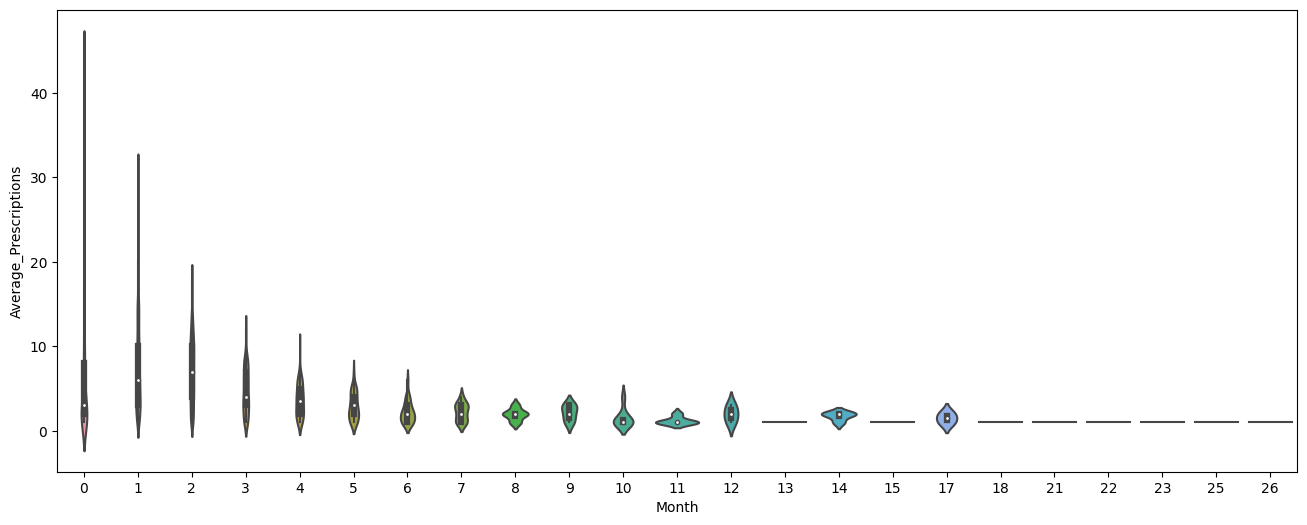

In [ ]:
plt.figure(figsize=(16, 6))
sns.violinplot(data=final_df, x='Month', y='Average_Prescriptions')



*   So, we can see that the average prescription taken by the Patients who take 'TARGET DRUG' in the frequency less than 1 month is in the range 1 to 9 (and) these are the patient category where there is a high chance of taking 'TARGET DRUG' for a maximum period of time.



*   And as we can see, the chance of taking a 'TARGET DRUG' for a maximum period of time decreases when the patients increase theirs 'TARGET DRUG' taking intervals.



*   The patients who are having a larger interval in taking 'TARGET DRUG' are having a more fixed times of taking them





 